In [1]:
import pathlib
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import statsmodels.formula.api as smf

import SessionTools.two_photon as st2p
import NeuromodPlasticity as nmp

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

In [2]:
# load dual imaging sessions
basedir = pathlib.Path('/media/mplitt/SSD_storage/2P_scratch/R18B05LexA_jGCaMP8s_R60D05Gal4_jRGECO1a')
sess_df = pd.read_csv(basedir / 'sessions.csv')
sess_df = sess_df.loc[sess_df['usable']==1]
sess_df['fly_id'] = [row['date']+'_'+row['fly']  for _, row in sess_df.iterrows()]

figfolder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/R18B05LexA_jGCaMP8s_R60D05Gal4_jRGECO1a')
figfolder.mkdir(parents=True, exist_ok=True)

In [3]:
def load_row(row):
    outdir = pathlib.PurePath( basedir / row['date'] / row['fly'] / row['session'] / 'preprocess.pkl')
    return st2p.preprocessing.EBImagingSession.from_file(outdir)

In [4]:
stats_df = nmp.dual_imaging.offset_stats(sess_df,load_row)
stats_df_unique = nmp.dual_imaging.offset_stats_unique(stats_df)    
stats_df_unique


fly_id  cl  offset_ch1  offset_ch2  offset_var_ch1  \
0   13_01_2025_fly4   1    0.550375    1.274900        0.849358   
1   13_01_2025_fly4   0    5.824313    6.124936        0.825863   
2   14_01_2025_fly1   1    2.033847    2.095309        0.678918   
3   14_01_2025_fly1   0    5.342582    6.071058        0.887927   
4   15_01_2025_fly1   1    3.103175    3.022125        0.688791   
5   15_01_2025_fly1   0    2.598768    2.470424        0.776944   
6   15_01_2025_fly2   1    5.621496    5.637567        0.639082   
7   15_01_2025_fly2   0    1.025951    0.867144        0.975067   
8   15_01_2025_fly3   1    1.399427    1.348107        0.701902   
9   15_01_2025_fly3   0    2.389417    2.225436        0.882531   
10  15_01_2025_fly4   1    5.126525    5.069561        0.687462   
11  15_01_2025_fly4   0    1.957098    2.122682        0.902145   
12  15_01_2025_fly5   1    0.774674    0.932241        0.492989   
13  15_01_2025_fly5   0    5.914870    5.979321        0.893520   
14  17_01_2025_fly1   1    2.285976    2.335472        0.573349   
15  17_01_2025_fly1   0    3.501506    3.519242        0.767043   
16  17_01_2025_fly2   1    3.657568    3.740209        0.823450   
17  17_01_2025_fly2   0    4.147958    3.692263        0.952259   
18  23_01_2025_fly1   1    0.473572    0.368010        0.763371   
19  23_01_2025_fly1   0    1.066631    0.908426        0.839059   
20  23_01_2025_fly2   1    5.930686    6.065103        0.723127   
21  23_01_2025_fly2   0    3.099009    2.972103        0.815295   
22  23_01_2025_fly3   1    5.662432    5.574318        0.322454   
23  23_01_2025_fly3   0    0.213274    0.309607        0.853322   

    offset_var_ch2  offset_diff  abs_offset_diff  pva_diff  fwhm_ch1  fwhm_ch2  
0         0.850665     0.036643         0.345749  0.388719  1.178097  1.178097  
1         0.848774     6.276977         0.461133  0.510967  1.178097  1.178097  
2         0.772624    -0.001675         0.693587  0.777335  0.785398  0.785398  
3         0.871866     0.073606         0.758157  0.849352  0.392699  0.392699  
4         0.758120    -0.072619         0.520748  0.584322  1.178097  1.178097  
5         0.788404     6.227437         0.344926  0.385949  1.178097  1.178097  
6         0.753531    -0.061466         0.651746  0.726918  1.178097  0.392699  
7         0.961566     6.212530         0.521237  0.590316  1.178097  1.178097  
8         0.724658    -0.069045         0.523876  0.587057  1.178097  1.178097  
9         0.911239     6.214864         0.419113  0.470350  1.178097  1.178097  
10        0.717555     0.011204         0.535842  0.622025  1.178097  1.178097  
11        0.909929     0.016585         0.350371  0.394977  1.178097  1.178097  
12        0.536386    -0.111267         0.387857  0.420286  1.178097  1.178097  
13        0.904151     6.269382         0.427178  0.489416  1.178097  1.178097  
14        0.608599    -0.042198         0.486684  0.556840  1.178097  1.178097  
15        0.766599     0.035940         0.489213  0.554829  1.178097  1.178097  
16        0.889205     0.013735         0.652203  0.740210  0.785398  0.785398  
17        0.972761     6.282521         0.631439  0.721787  1.178097  0.392699  
18        0.773535    -0.046460         0.527317  0.601873  1.178097  1.178097  
19        0.857002     0.050707         0.611533  0.707533  1.178097  1.178097  
20        0.748330     0.046899         0.577293  0.656049  1.178097  1.178097  
21        0.831580     6.272034         0.596791  0.678233  1.178097  1.178097  
22        0.401232     0.063379         0.395400  0.424602  1.178097  1.178097  
23        0.863496     6.281362         0.320863  0.335492  1.178097  1.178097

In [5]:
stats_df_unique['fly_id'].unique().shape

(12,)

closed loop difference from red fwhm: t=0.0,p=0.00048828125
closed loop difference from green fwhm: t=0.0,p=0.00048828125
closed loop diff from chance: t=0.0, p=0.00048828125
dark difference from red fwhm: t=0.0,p=0.00048828125
dark difference from green fwhm: t=0.0,p=0.00048828125
dark diff from chance: t=0.0, p=0.00048828125
corrected pvals: [0.00097656 0.00097656], reject null: [ True  True]
12 12


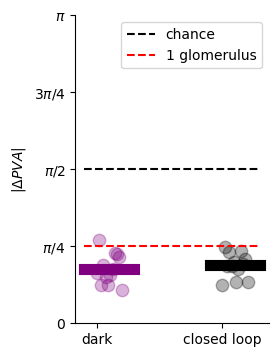

In [10]:
fig, ax = plt.subplots(1,1,figsize=[2.5,4])
mask = stats_df_unique['cl']==1


k = 'pva_diff'
x = np.linspace(0,.1, num=mask.sum())
ax.scatter(x+.5, stats_df_unique.loc[mask, k], color='k', alpha=.3, s=80)
ax.plot([.95-.5,1.15-.5],stats_df_unique.loc[mask,k].mean()*np.ones([2,]), color='black', linewidth=8)
# ax.scatter(x+1.2, stats_df_unique.loc[mask, 'fwhm_ch1'], color='k', alpha=.3, s=80)
# ax.scatter(x+1.4, stats_df_unique.loc[mask, 'fwhm_ch2'], color='green', alpha=.3, s=80)

ax.scatter(np.linspace(0,.1,num=(~mask).sum()), stats_df_unique.loc[~mask, k], color='purple', alpha=.3, s=80)
ax.plot([-.05,.15],stats_df_unique.loc[~mask,k].mean()*np.ones([2,]), color='purple', linewidth=8)
# ax.scatter(x+.2, stats_df_unique.loc[~mask, 'fwhm_ch1'], color='k', alpha=.3, s=80)
# ax.scatter(x+.4, stats_df_unique.loc[~mask, 'fwhm_ch2'], color='green', alpha=.3, s=80)


fwhm_ch1 = stats_df_unique.loc[mask,'fwhm_ch1'].mean()
fwhm_ch2 = stats_df_unique.loc[mask,'fwhm_ch2'].mean()
ax.plot([-.05,.65], np.pi/2*np.ones((2,)), 'k--', label='chance') # chance
# ax.plot([-.05,1.15], fwhm_ch1*np.ones((2,)), color = 'k', linestyle='--', label='EPG fwhm') # ch1 bump width
# ax.plot([-.05,1.15], fwhm_ch2*np.ones((2,)), color = 'green', linestyle='--', label='EL fwhm') # ch1 bump width
ax.plot([-.05,.65], np.pi/4*np.ones((2,)), color = 'r', linestyle='--', label='1 glomerulus') # ch1 bump width
# ax.plot([-.05,1.15],  fwhm1, 'purple--') # chance
ax.set_ylim([0,np.pi])
ax.set_xticks([0,.5], labels=['dark', 'closed loop'])
_ = ax.set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4, np.pi], labels=[0, r"$\pi$/4", r"$\pi$/2", r"$3\pi$/4", r"$\pi$"])
ax.set_ylabel(r'$| \Delta PVA |$')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig(figfolder / "PVA_diff.pdf")

t, p = sp.stats.wilcoxon(stats_df_unique.loc[mask, k]-fwhm_ch1)
print(f"closed loop difference from red fwhm: t={t},p={p}")
t, p = sp.stats.wilcoxon(stats_df_unique.loc[mask, k]-fwhm_ch1)
print(f"closed loop difference from green fwhm: t={t},p={p}")
t,p = sp.stats.wilcoxon(stats_df_unique.loc[mask, k]-np.pi/2)
print(f"closed loop diff from chance: t={t}, p={p}")
pvals = [p]

t, p = sp.stats.wilcoxon(stats_df_unique.loc[~mask, k]-fwhm_ch1)
print(f"dark difference from red fwhm: t={t},p={p}")
t, p = sp.stats.wilcoxon(stats_df_unique.loc[~mask, k]-fwhm_ch1)
print(f"dark difference from green fwhm: t={t},p={p}")
t,p = sp.stats.wilcoxon(stats_df_unique.loc[~mask, k]-np.pi/2)
print(f"dark diff from chance: t={t}, p={p}")
pvals.append(p)

reject, pvals_corr = pg.multicomp(pvals, method='holm')
print(f"corrected pvals: {pvals_corr}, reject null: {reject}")
print(mask.sum(), (~mask).sum())

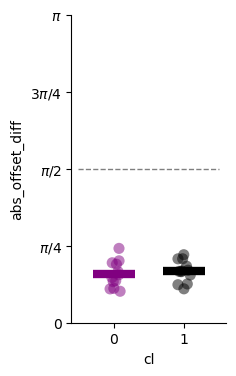

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=[2,4])

colors = ['purple' , 'black']
sns.stripplot(data=stats_df_unique, x='cl', 
              y='abs_offset_diff', dodge=False, alpha=.5,
              ax=ax, legend=False, palette=colors, hue='cl', 
              order = [0, 1], s=8)
sns.pointplot(data=stats_df_unique, x = 'cl', y = 'abs_offset_diff',
               estimator=np.mean, linestyle='none', errorbar=None,
               marker="_", markersize=30, markeredgewidth=6,
              ax=ax, hue='cl', palette=colors, order = [0, 1], legend=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
              labels=['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'])
ax.set_ylim([0, np.pi])
ax.hlines(np.pi/2, -0.5, 1.5, color='black', linestyle='--', linewidth=1,
          alpha=.5, zorder=-1)
fig.savefig(figfolder / "PVA_diff_sns.pdf")

In [7]:
def shift_by_max(arr, sortby_index):

    for t in range(arr.shape[-1]):
        max_index = np.argmax(arr[sortby_index, :, t])
        arr[:, :, t] = np.roll(arr[:, :, t], -max_index+8, axis=1)
    return arr

def shift_by_pva(arr, pva, sortby_index, bins = np.linspace(-np.pi-1E-3, np.pi+1e-3, num=16)):
    for t in range(arr.shape[-1]):

        shift = int(np.round((pva[sortby_index,t]+np.pi)/2/np.pi*16))
        # print(shift)
        arr[:,:,t] = np.roll(arr[:,:,t], -shift+8, axis=1)
    return arr

ccw_turn_arr, cw_turn_arr = [], []
dh_min, dh_max = 180/180*np.pi, 360/180*np.pi
for _, row in sess_df.iterrows():
    if row['closed_loop'] == 0:
        
        ts = nmp.session.GetTS(load_row(row), channels=(0,1), h_sigma=0.1, dh_sigma=0.3)

        ccw_turn_mask = np.logical_and(ts.dh > dh_min, ts.dh < dh_max)
        cw_turn_mask = np.logical_and(ts.dh < -dh_min, ts.dh > -dh_max)

        
        # pva_bins = np.digitize(ts.phi, bins)
        # print(pva_bins.np.unique)

        if ccw_turn_mask.sum() > 0:
            ccw_turns = shift_by_max(ts.dff[:,:,ccw_turn_mask], 0).mean(axis=-1)
            # l_turns = shift_by_pva(ts.dff[:,:,l_turn_mask], ts.phi[:,l_turn_mask],0).mean(axis=-1)
            # print(l_turns.shape)
            ccw_turn_arr.append(ccw_turns)

        if cw_turn_mask.sum() > 0:
            cw_turns = shift_by_max(ts.dff[:,:,cw_turn_mask], 0).mean(axis=-1)
            # r_turns = shift_by_pva(ts.dff[:,:,r_turn_mask], ts.phi[:,r_turn_mask], 0).mean(axis=-1)
            
            cw_turn_arr.append(cw_turns)
    
ccw_turn_arr = np.array(ccw_turn_arr)
# print(l_turn_arr.shape)
ccwmin, ccwmax = np.amin(ccw_turn_arr, axis=-1, keepdims=True), np.amax(ccw_turn_arr, axis=-1, keepdims=True)
ccw_turn_arr = (ccw_turn_arr-ccwmin)/(ccwmax-ccwmin)
cw_turn_arr = np.array(cw_turn_arr)
cwmin, cwmax = np.amin(cw_turn_arr, axis=-1, keepdims=True), np.amax(cw_turn_arr, axis=-1, keepdims=True)
cw_turn_arr = (cw_turn_arr-cwmin)/(cwmax-cwmin)



[-0.0966048  -0.21526822] [-6.79891311]
[-0.02613955  0.10313268] [7.4067532]


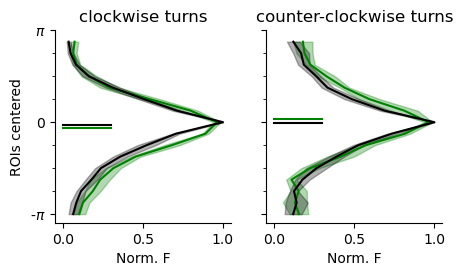

In [8]:
fig, ax = plt.subplots(1,2, figsize=[5,2.5], sharey=True)

# phases = np.arange(0, np.pi+1E-3, np.pi/8).tolist()
# phases = [-i for i in phases[-1:0:-1]] + phases
# print(len(phases))
phases = np.linspace(-np.pi, np.pi, num=cw_turn_arr.shape[-1]+1)
phases = (phases[:-1]+phases[1:])/2
phases -= phases[8]
mu, sem = cw_turn_arr.mean(axis=0), sp.stats.sem(cw_turn_arr, axis=0)
x,y = st2p.utilities.pol2cart(mu, phases[np.newaxis,:])
pva = np.angle(x.mean(axis=-1)+1j*y.mean(axis=-1))
ax[0].plot( mu[1,:],phases, color='green')
ax[0].plot([0,.3], [pva[1], pva[1]], color='green')
ax[0].fill_betweenx(phases, mu[1,:]-sem[1,:], mu[1,:]+sem[1,:], color='green', alpha=.3)
ax[0].plot(mu[0,:], phases, color='k')
ax[0].fill_betweenx(phases, mu[0,:]-sem[0,:], mu[0,:]+sem[0,:], color='k', alpha=.3)
ax[0].plot([0,.3], [pva[0], pva[0]], color='black')
ax[0].set_title('clockwise turns')
print(pva, np.diff(pva)*180/np.pi)


mu, sem = ccw_turn_arr.mean(axis=0), sp.stats.sem(ccw_turn_arr, axis=0)
x,y = st2p.utilities.pol2cart(mu, phases[np.newaxis,:])
pva = np.angle(x.mean(axis=-1)+1j*y.mean(axis=-1))
ax[1].plot(mu[1,:], phases, color='green')
ax[1].plot([0,.3], [pva[1], pva[1]], color='green')
ax[1].fill_betweenx(phases, mu[1,:]-sem[1,:], mu[1,:]+sem[1,:], color='green', alpha=.3)
ax[1].plot(mu[0,:], phases, color='k')
ax[1].fill_betweenx(phases, mu[0,:]-sem[0,:], mu[0,:]+sem[0,:], color='k', alpha=.3)
ax[1].plot([0,.3], [pva[0], pva[0]], color='k')
ax[1].set_title('counter-clockwise turns')
print(pva, np.diff(pva)*180/np.pi)

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    a.set_yticks([-np.pi, 0,  np.pi], 
                labels=[r'-$\pi$',  r'0', r'$\pi$'])
    a.yaxis.set_minor_locator(AutoMinorLocator())
    a.set_xlabel('Norm. F')
ax[0].set_ylabel('ROIs centered')
fig.savefig(figfolder / 'EPG_centered_turns.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# dh_bins = np.linspace(.0, 3.14, num=20)
dh_bins = np.linspace(-np.pi, np.pi, num=11)

# stats_df = nmp.dual_imaging.rho_stats(sess_df, load_row, dh_bins=dh_bins, abs=True)
stats_df = nmp.dual_imaging.rho_stats(sess_df, load_row, dh_bins=dh_bins, abs=False)

stats_df.loc[stats_df['cl']>1, 'cl'] = 1 #


grouped_rho1 = stats_df.groupby(['fly_id','cl'])['rho1_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_rho2 = stats_df.groupby(['fly_id','cl'])['rho2_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_rho1.head()

grouped_pvd = stats_df.groupby(['fly_id', 'cl'])['pva_diff'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()


/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:133: RuntimeWarning: Mean of empty slice.
  rho1_dig = np.array([ts.rho[0, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mplitt/mambaforge/envs/NeuroModPlasticity/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:136: RuntimeWarning: Mean of empty slice.
  rho2_dig = np.array([ts.rho[1, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:143: RuntimeWarning: Mean of empty slice.
  pva_diff = np.array([pvd[(dh_dig==i)].mean() for i in range(len(dh_bins))])
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:133: RuntimeWarning: Mean of empty slice.
  rho1_dig = np.array([ts.rho[0, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mpl

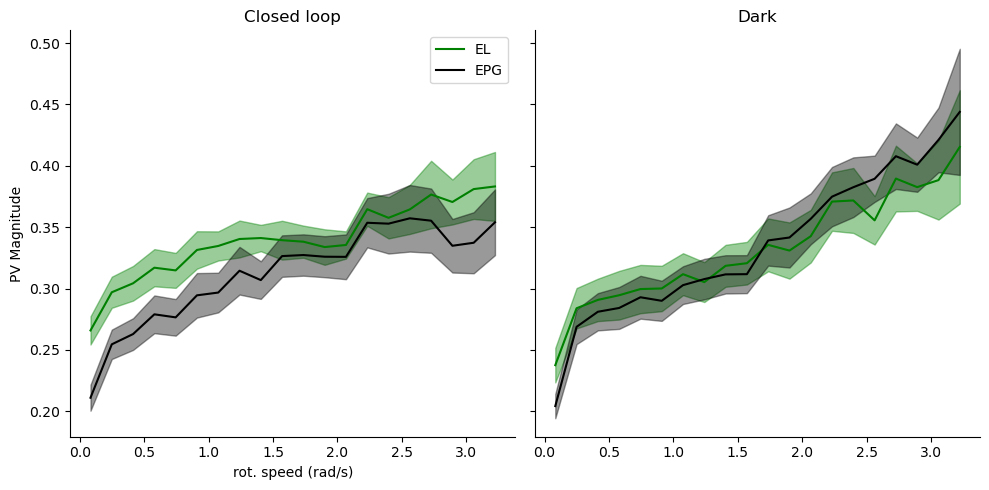

In [14]:
# edit to work with dual imaging data

dh_bin_centers = dh_bins+np.diff(dh_bins)[0]/2

fig,ax = plt.subplots(1,2,sharey=True, figsize=[10,5])

rho1_dig = np.stack(grouped_rho1.loc[grouped_rho1['cl']==1,'rho1_dig'])
mu, sem = np.nanmean(rho1_dig, axis=0), sp.stats.sem(rho1_dig, axis=0, nan_policy='omit')
ax[0].plot(dh_bin_centers, mu, color='green', label='EL')
ax[0].fill_between(dh_bin_centers, mu-sem, mu+sem, color='green', alpha=.4)

rho2_dig = np.stack(grouped_rho2.loc[grouped_rho2['cl']==1,'rho2_dig'])
mu, sem = np.nanmean(rho2_dig, axis=0), sp.stats.sem(rho2_dig, axis=0, nan_policy='omit')
ax[0].plot(dh_bin_centers, mu, color='black', label='EPG')
ax[0].fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)


rho1_dig = np.stack(grouped_rho1.loc[grouped_rho1['cl']==0,'rho1_dig'])
mu, sem = np.nanmean(rho1_dig, axis=0), sp.stats.sem(rho1_dig, axis=0, nan_policy='omit')
ax[1].plot(dh_bin_centers, mu, color='green', label='EL')
ax[1].fill_between(dh_bin_centers, mu-sem, mu+sem, color='green', alpha=.4)

rho2_dig = np.stack(grouped_rho2.loc[grouped_rho2['cl']==0,'rho2_dig'])
mu, sem = np.nanmean(rho2_dig, axis=0), sp.stats.sem(rho2_dig, axis=0, nan_policy='omit')
ax[1].plot(dh_bin_centers, mu, color='black', label='EPG')
ax[1].fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)

ax[0].legend()


for _ax in ax:
    _ax.spines['top'].set_visible(False)
    _ax.spines['right'].set_visible(False)

ax[0].set_title('Closed loop')
ax[1].set_title('Dark')
ax[0].set_ylabel('PV Magnitude')
ax[0].set_xlabel('rot. speed (rad/s)')

fig.tight_layout()
fig.savefig(figfolder / 'PV_magnitude_summary.pdf', format='pdf', bbox_inches='tight')

0.2953962718728049 0.0007114957970120766
0.32551381638983173 8.193258628020265e-05


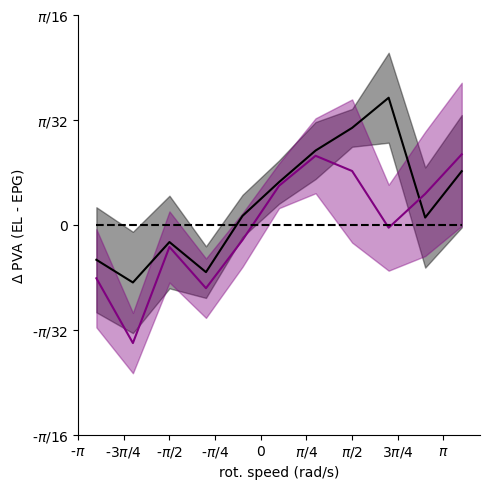

In [ ]:
fig,ax = plt.subplots(sharey=True, figsize=[5,5])
# dh_bin_centers_deg = dh_bin_centers*180/np.pi
dh_bin_centers = dh_bins+np.diff(dh_bins)[0]/2
pvd_dig = np.stack(grouped_pvd.loc[grouped_pvd['cl']==1,'pva_diff'])
r, p = sp.stats.spearmanr(pvd_dig.ravel(), (dh_bin_centers[np.newaxis,:]*np.ones_like(pvd_dig)).ravel(), nan_policy='omit')
print(r,p)
mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')

ax.plot(dh_bin_centers, mu, color='black')
ax.fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)


pvd_dig = np.stack(grouped_pvd.loc[grouped_pvd['cl']==0,'pva_diff'])
r, p = sp.stats.spearmanr(pvd_dig.ravel(), (dh_bin_centers[np.newaxis,:]*np.ones_like(pvd_dig)).ravel(), nan_policy='omit')
print(r,p)
mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
ax.plot(dh_bin_centers, mu, color='purple')
ax.fill_between(dh_bin_centers, mu-sem, mu+sem, color='purple', alpha=.4)
# _ = ax.set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4, np.pi], labels=[0, r"$\pi$/4", r"$\pi$/2", r"$3\pi$/4", r"$\pi$"])
ax.plot(dh_bin_centers, np.zeros_like(dh_bin_centers), color='k', linestyle='--')
_ = ax.set_yticks([ -np.pi/16, -np.pi/32, 0, np.pi/32, np.pi/16,], 
                  labels=[  r"-$\pi$/16", r"-$\pi$/32", 0, r"$\pi$/32", r"$\pi$/16"])

_ = ax.set_xticks([-np.pi,-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], 
                  labels=[  r"-$\pi$", r"-3$\pi$/4", r"-$\pi$/2", r"-$\pi$/4", 0, r"$\pi$/4", r"$\pi$/2", r"3$\pi$/4", r"$\pi$"])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([-np.pi/16,np.pi/16])

ax.set_ylabel(r'$\Delta$ PVA (EL - EPG)')
ax.set_xlabel('rot. speed (rad/s)')

fig.tight_layout()
fig.savefig(figfolder / 'PVA_diff_v_speed.pdf', format='pdf')

In [18]:
print(np.pi/8, np.pi/18)
print(np.pi*(1/8-1/18))
print(np.pi/16 - np.pi/18, np.pi/64)

0.39269908169872414 0.17453292519943295
0.2181661564992912
0.021816615649929122 0.04908738521234052


In [13]:
pv_bins = np.linspace(0,.8, num=20)

stats_df = nmp.dual_imaging.pvdiff_rho_stats(sess_df, load_row, pv_bins)

stats_df.loc[stats_df['cl']>1, 'cl'] = 1 #


grouped_pvd = stats_df.groupby(['fly_id','cl'])['pva_diff'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_pvd.head()



/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:202: RuntimeWarning: Mean of empty slice.
  pva_diff = np.array([pva_diff[rho_dig==i].mean() for i in range(pv_bins.shape[0])])
/home/mplitt/mambaforge/envs/NeuroModPlasticity/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:202: RuntimeWarning: Mean of empty slice.
  pva_diff = np.array([pva_diff[rho_dig==i].mean() for i in range(pv_bins.shape[0])])
/home/mplitt/mambaforge/envs/NeuroModPlasticity/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:202: RuntimeWarning: Mean of empty slice.
  pva_diff = np.array([pva_diff[rho_dig==i].mean() for i in range(pv_bins.shape[0

fly_id  cl                                           pva_diff
0  13_01_2025_fly2   0  [nan, 1.73009843897325, 1.373078025221258, 1.2...
1  13_01_2025_fly4   0  [nan, 0.888259264411423, 1.3115326819095234, 0...
2  13_01_2025_fly4   1  [nan, 1.5694242865339458, 1.5262819194552244, ...
3  14_01_2025_fly1   0  [nan, 0.7935180332792436, 1.4987029129133587, ...
4  14_01_2025_fly1   1  [nan, 1.2677795141265271, 1.4749014674632517, ...

/tmp/ipykernel_384241/2647287140.py:6: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
/tmp/ipykernel_384241/2647287140.py:6: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
/tmp/ipykernel_384241/2647287140.py:11: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
/tmp/ipykernel_384241/2647287140.py:11: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, n

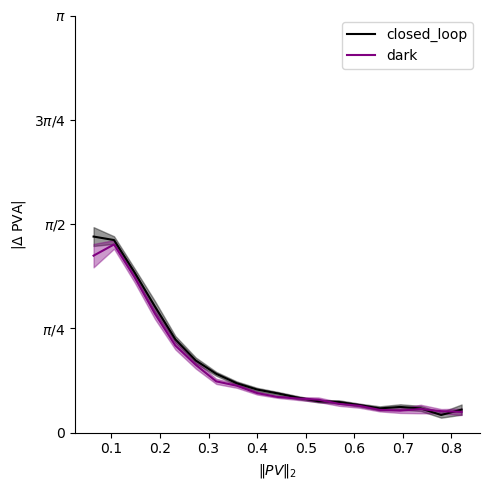

In [14]:
pv_bin_centers = pv_bins+np.diff(pv_bins)[0]/2

fig,ax = plt.subplots(sharey=True, figsize=[5, 5])

pvd_dig = np.stack(grouped_pvd.loc[grouped_pvd['cl']==1,'pva_diff'])
mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
ax.plot(pv_bin_centers, mu, color='black', label='closed_loop')
ax.fill_between(pv_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)

pvd_dig = np.stack(grouped_pvd.loc[grouped_pvd['cl']==0,'pva_diff'])
mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
ax.plot(pv_bin_centers, mu, color='purple', label='dark')
ax.fill_between(pv_bin_centers, mu-sem, mu+sem, color='purple', alpha=.4)

ax.legend()

_ = ax.set_yticks([0,np.pi/4,np.pi/2,3*np.pi/4, np.pi], labels=[0, r"$\pi$/4", r"$\pi$/2", r"$3\pi$/4", r"$\pi$"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('|$\Delta$ PVA|')
ax.set_xlabel('$\| PV \|_2$')

fig.tight_layout()
fig.savefig(figfolder / 'deltaPVA_PV_magnitude_summary.pdf', format='pdf', bbox_inches='tight')

/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:456: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=[8,4])


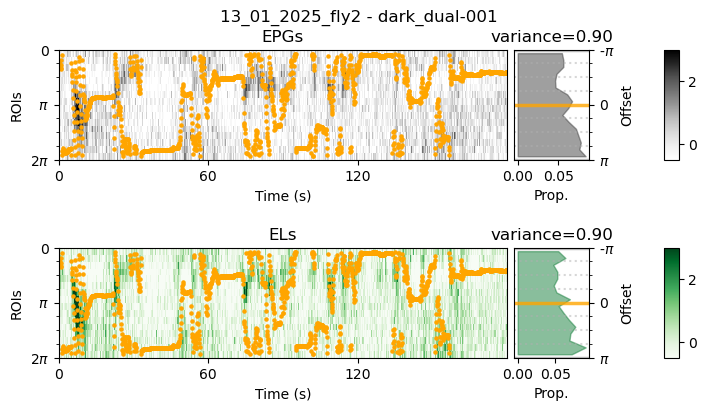

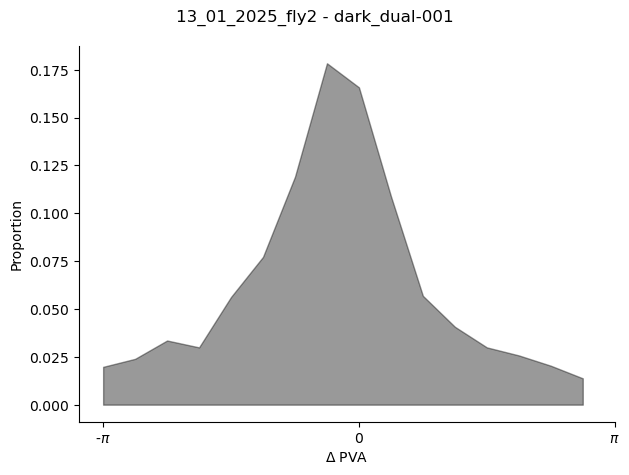

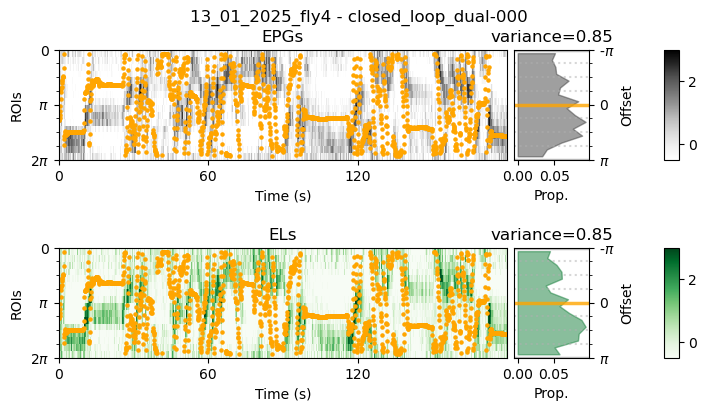

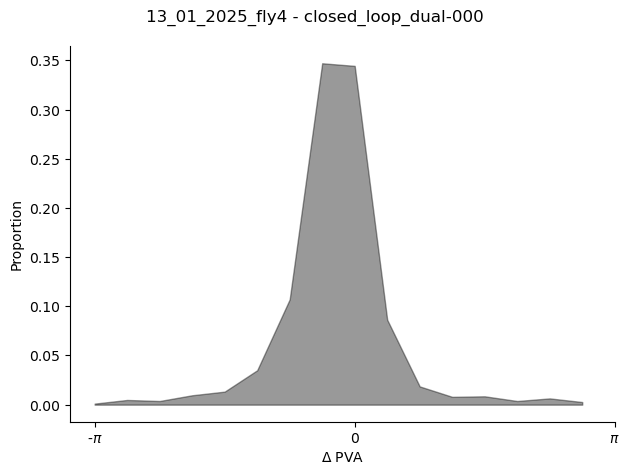

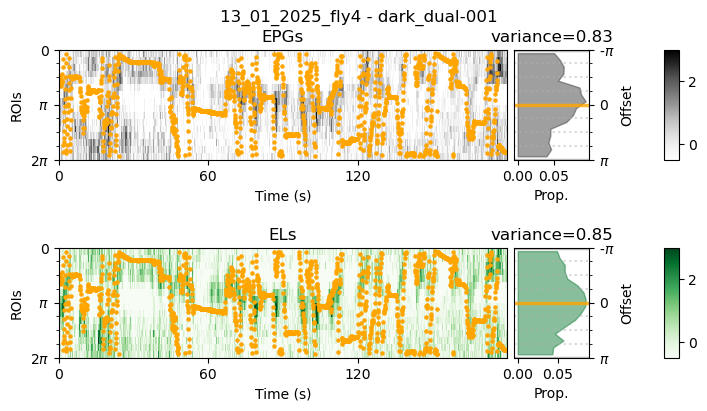

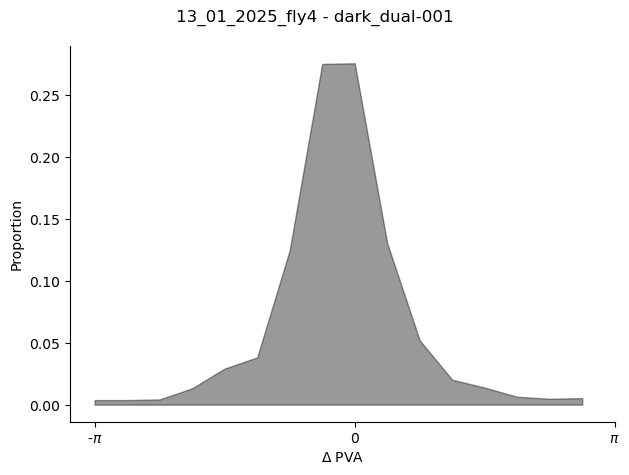

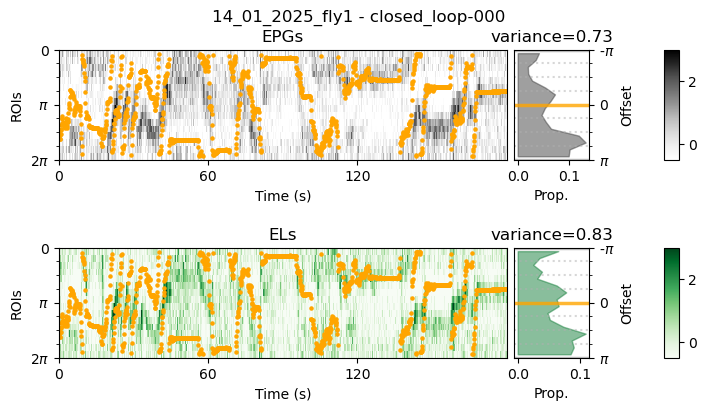

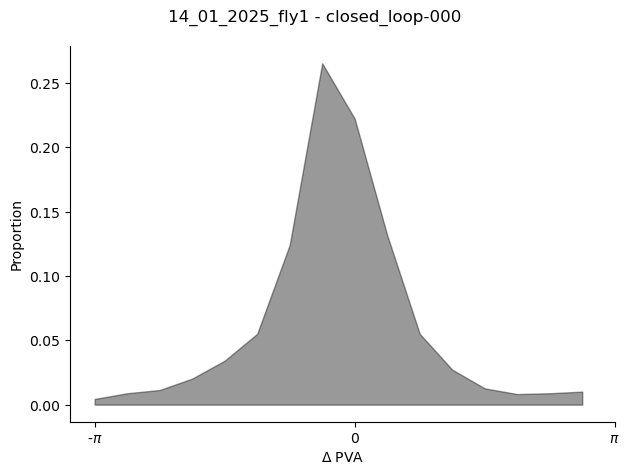

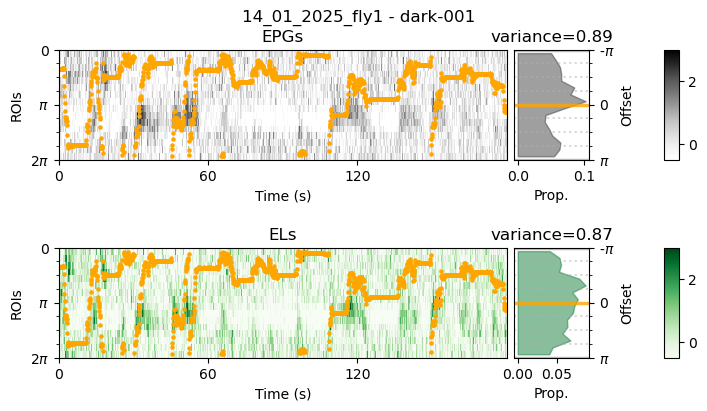

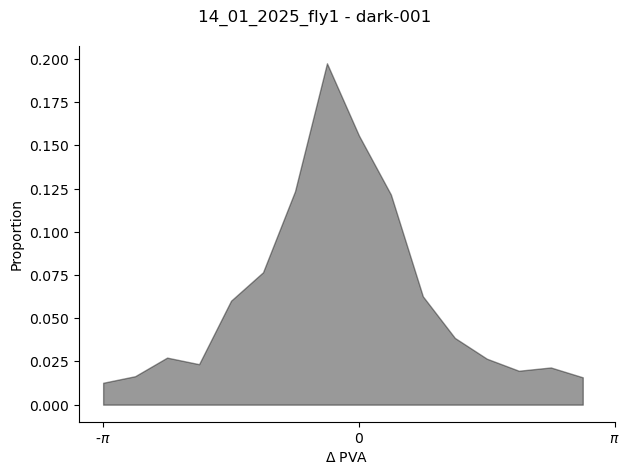

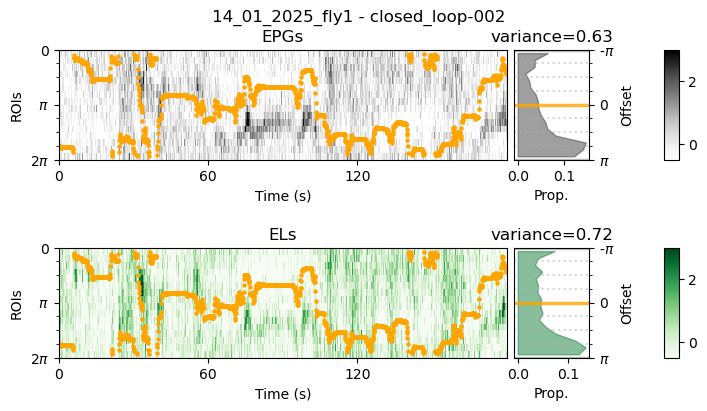

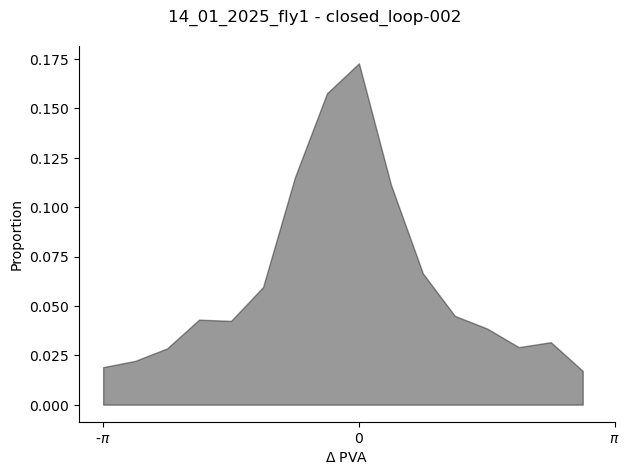

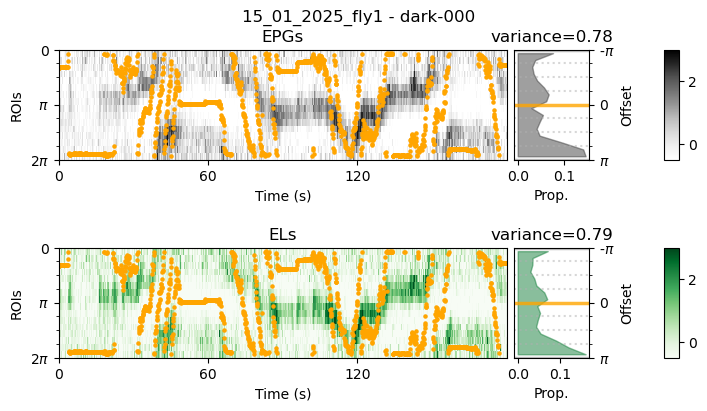

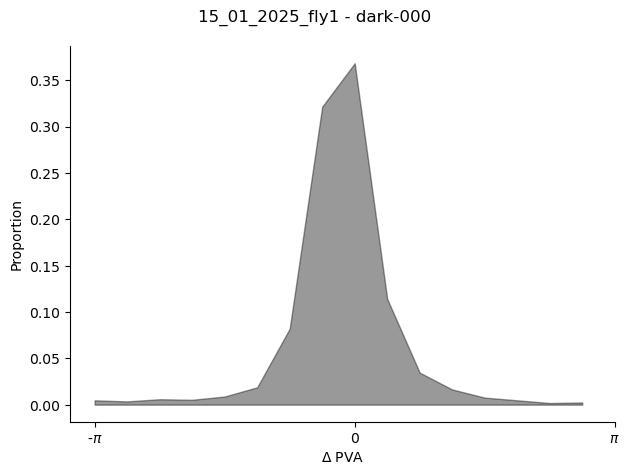

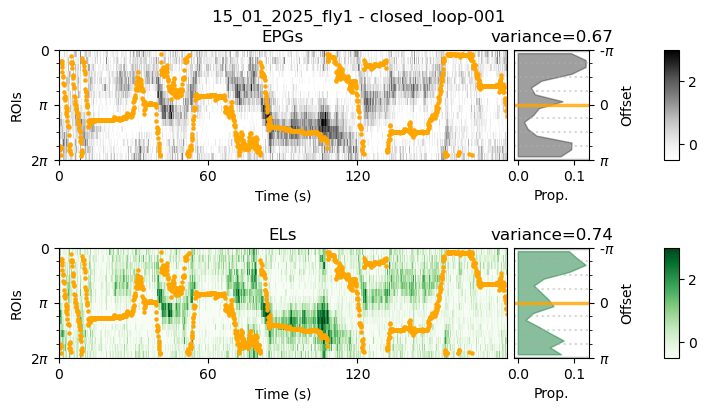

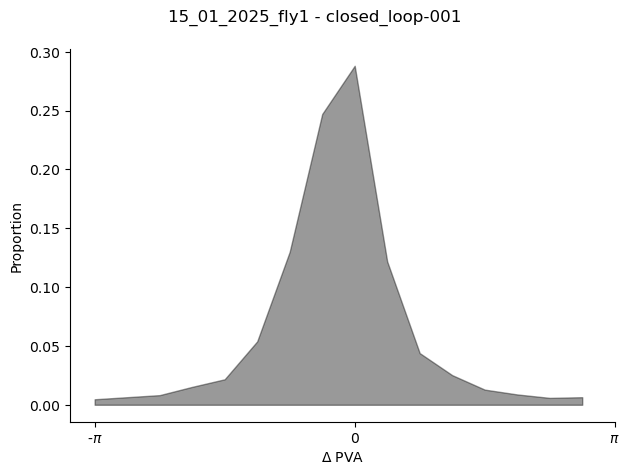

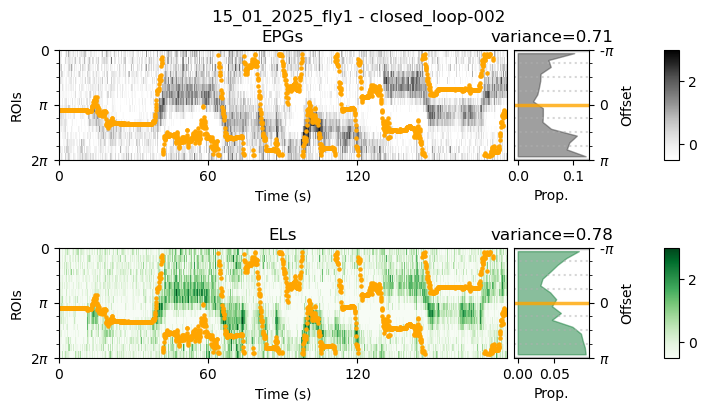

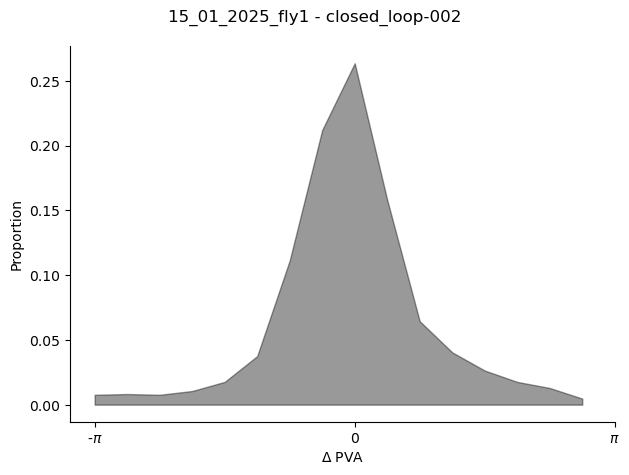

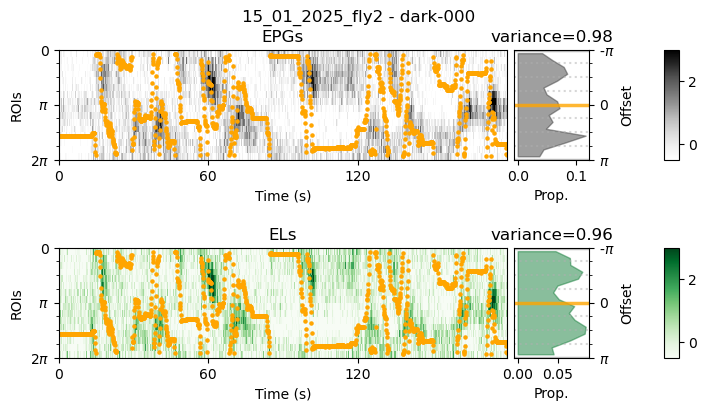

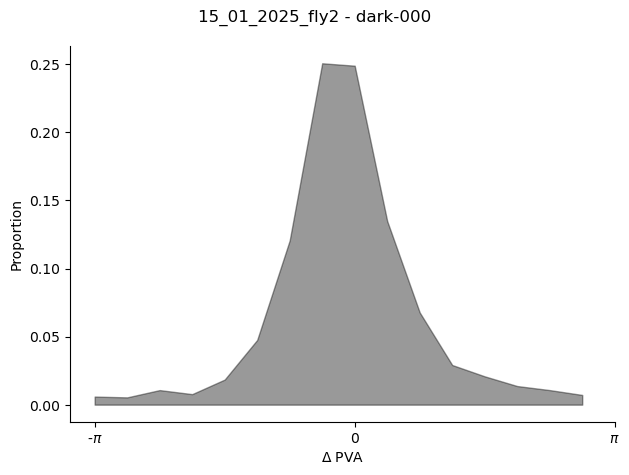

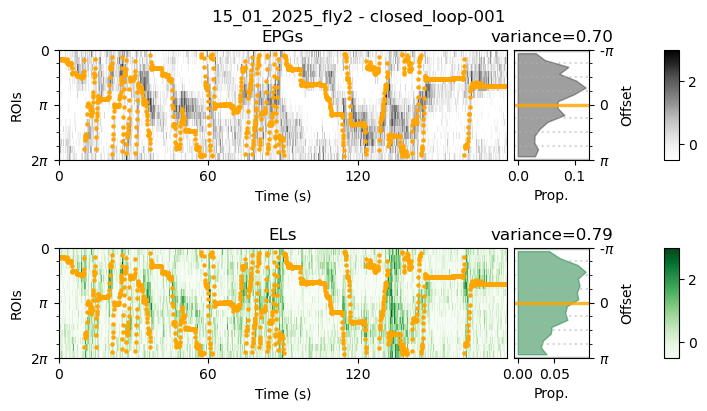

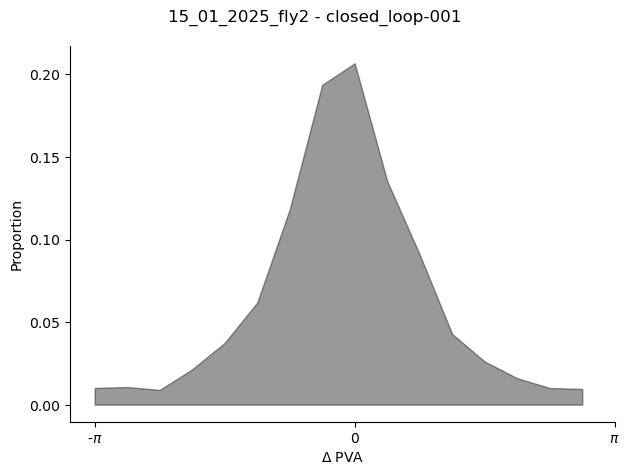

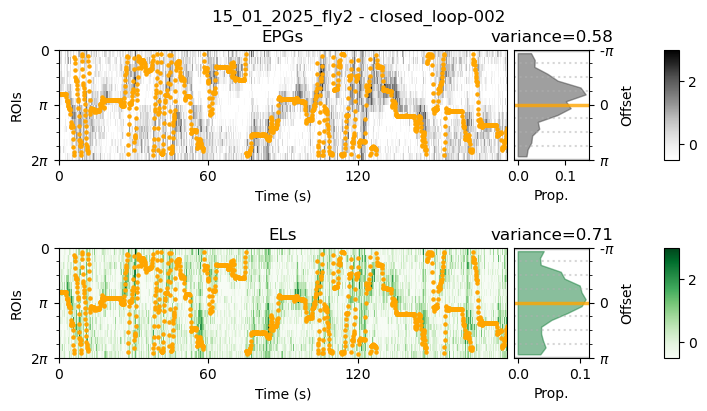

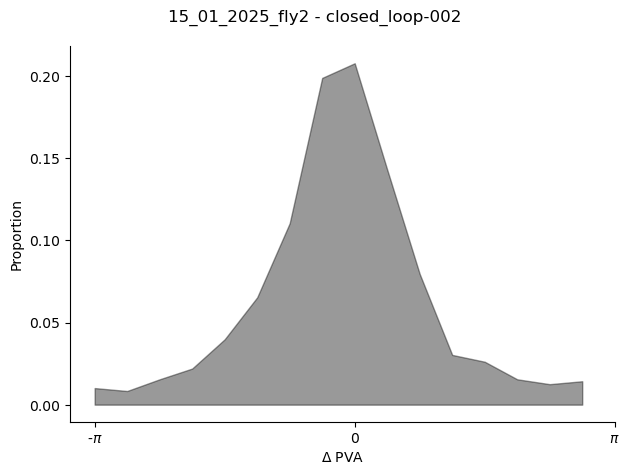

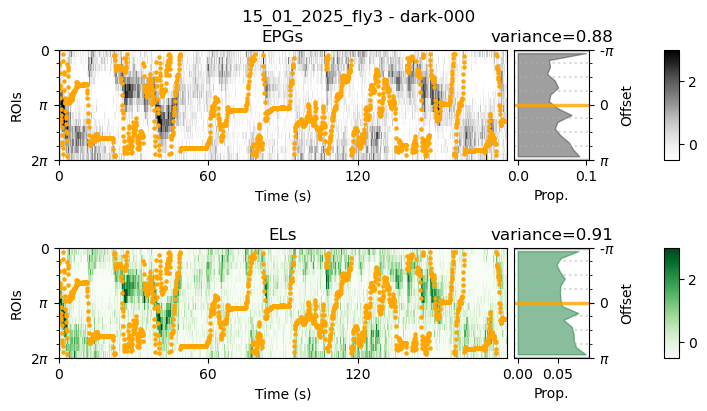

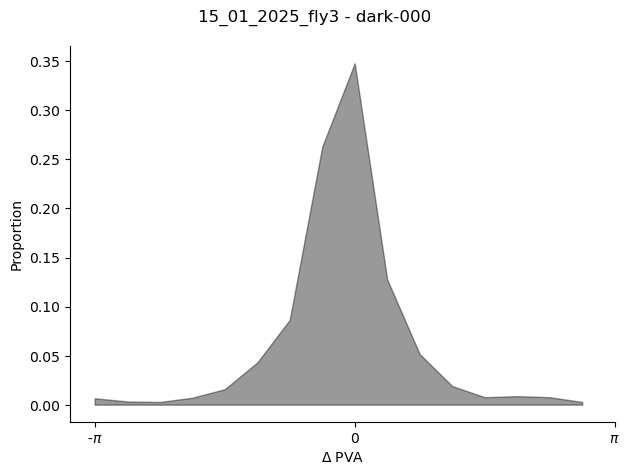

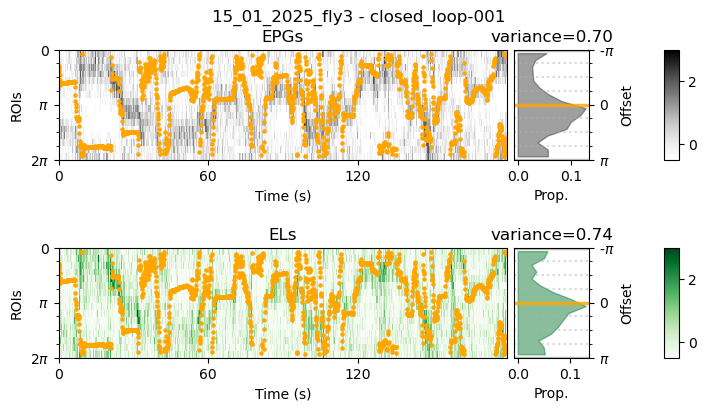

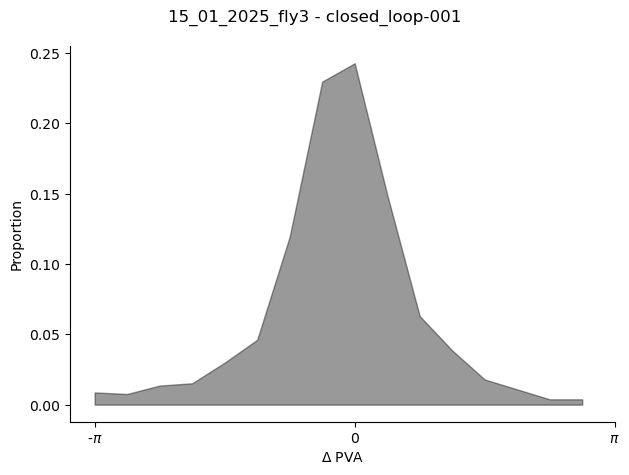

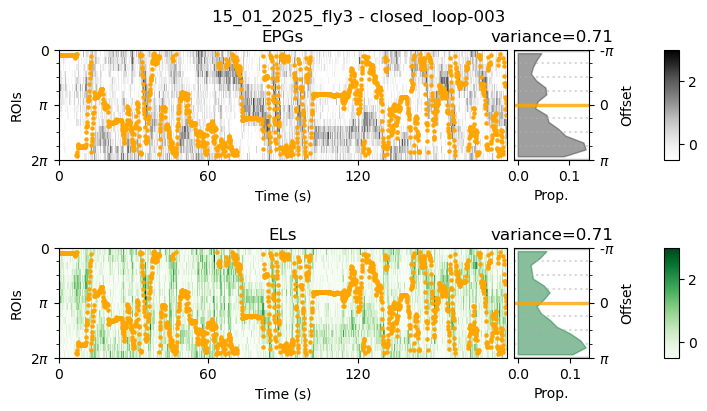

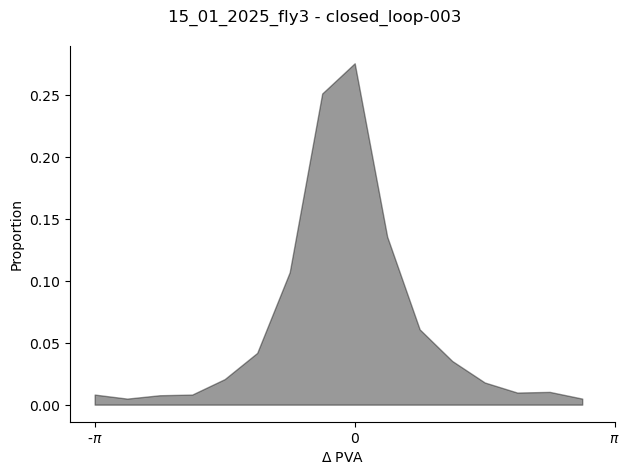

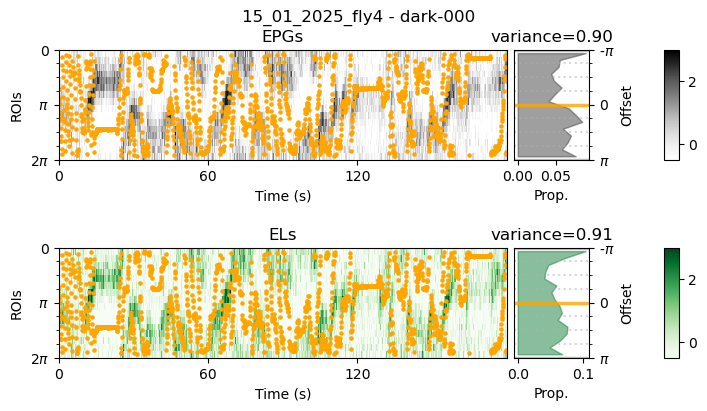

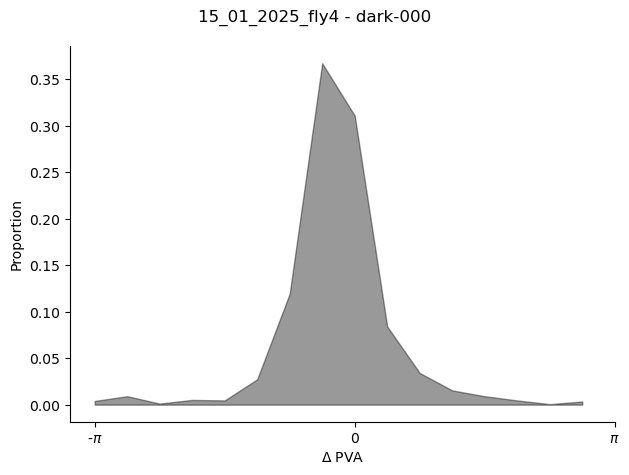

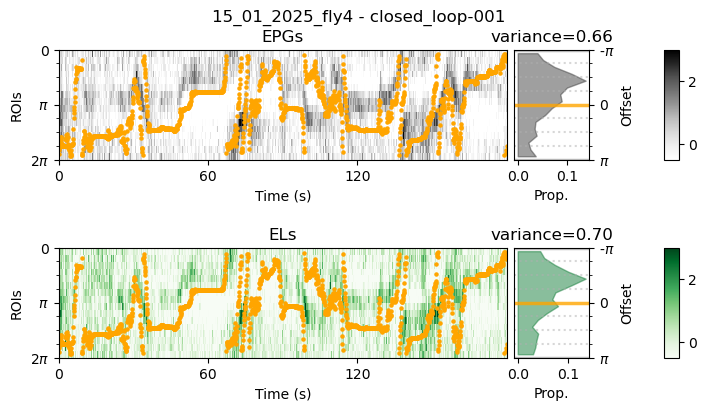

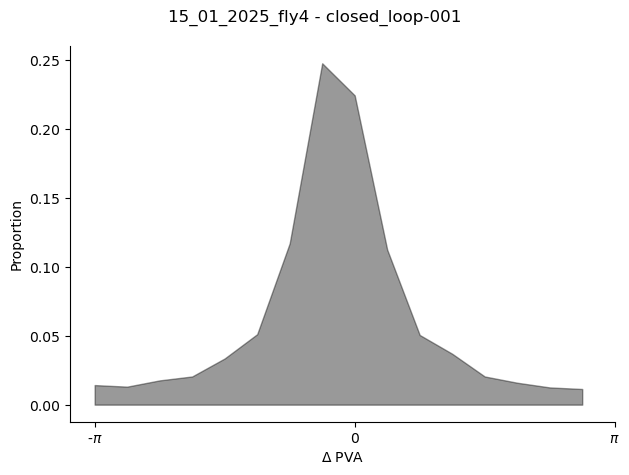

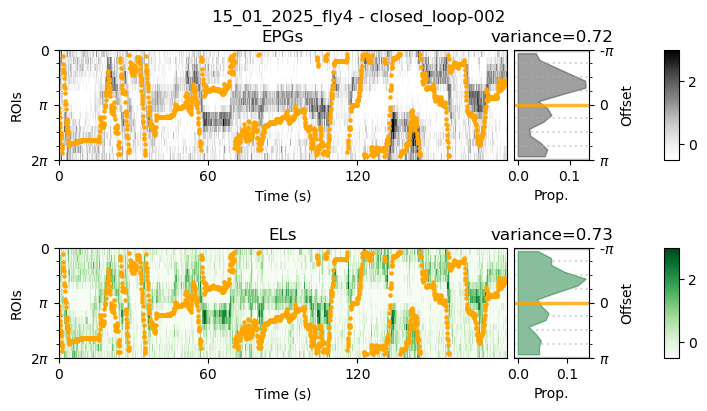

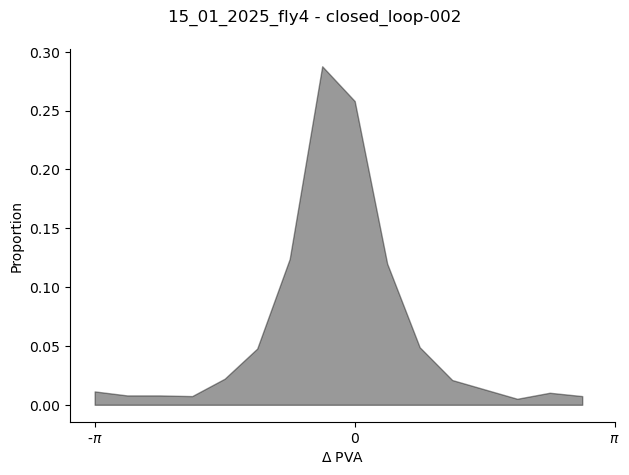

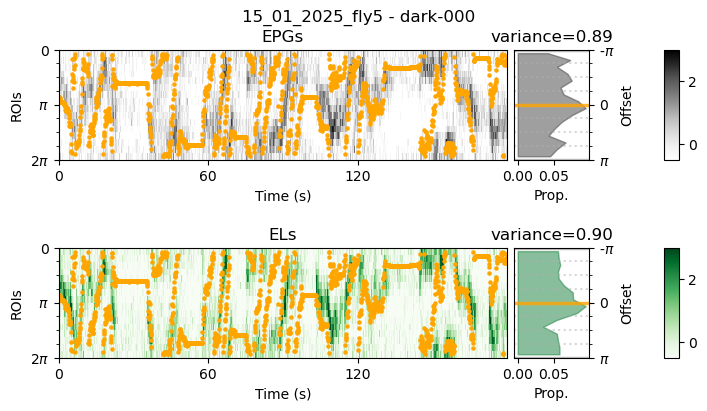

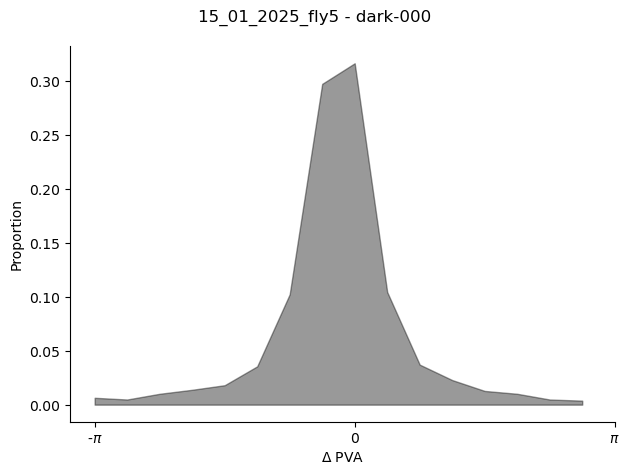

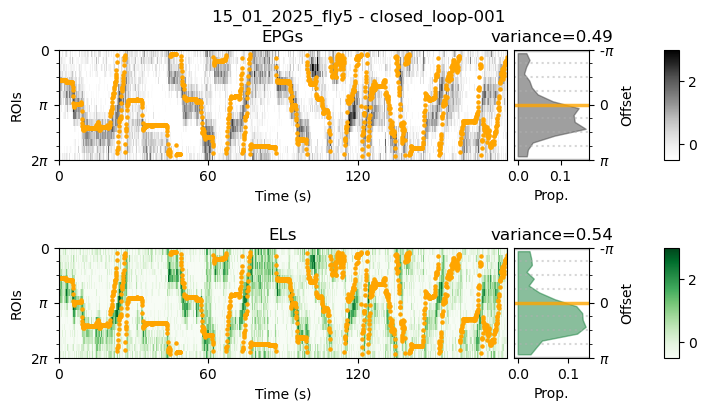

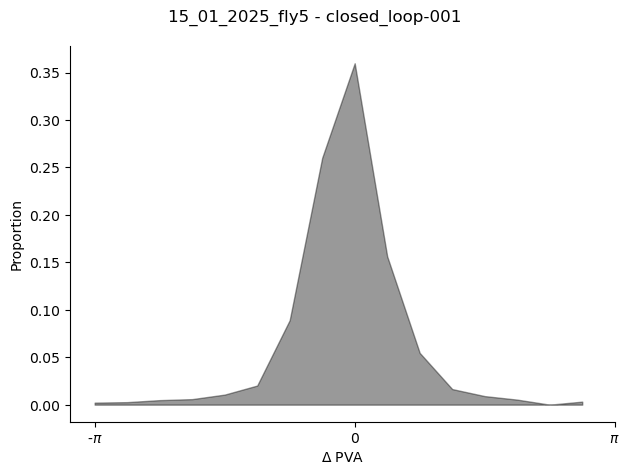

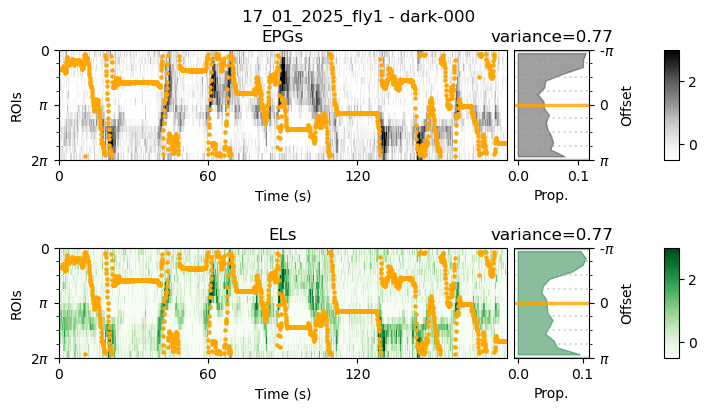

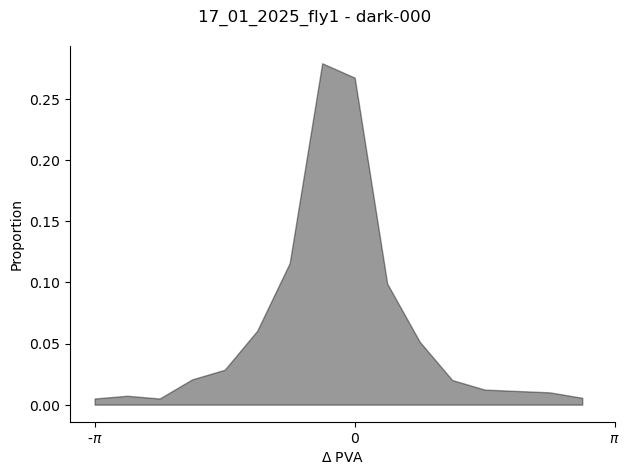

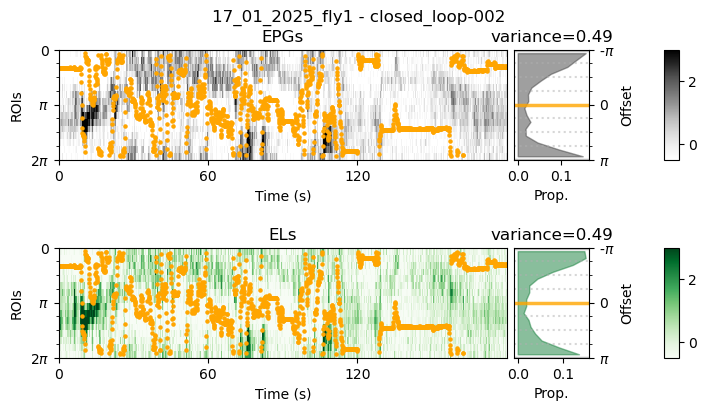

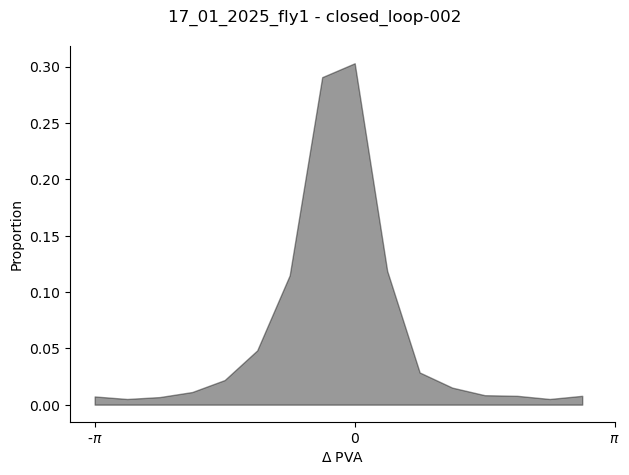

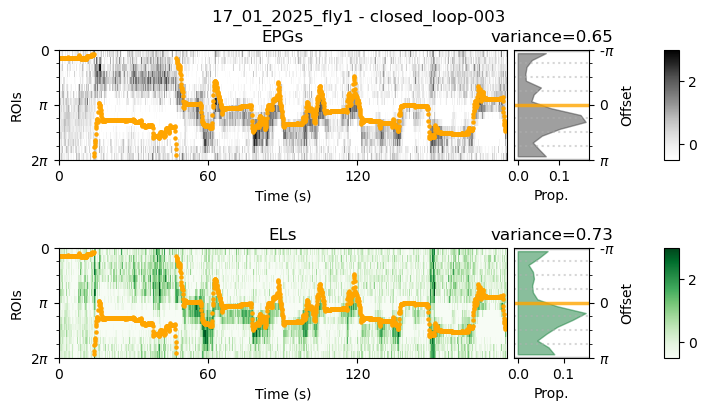

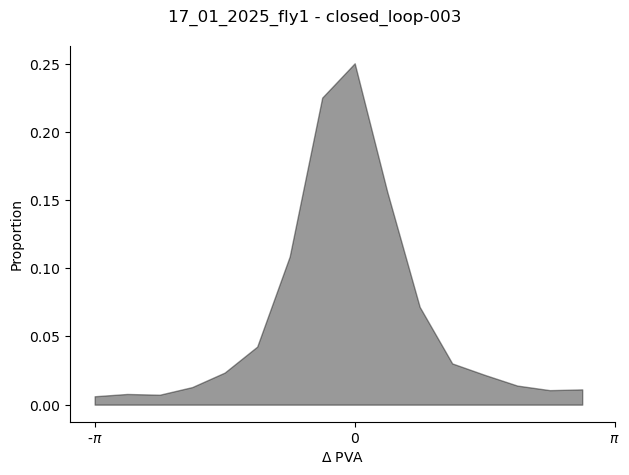

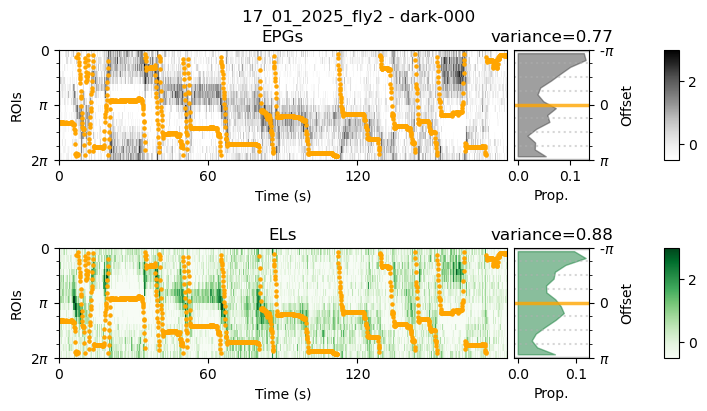

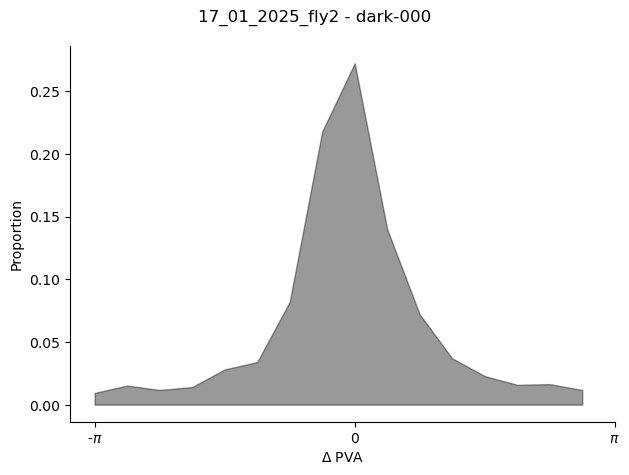

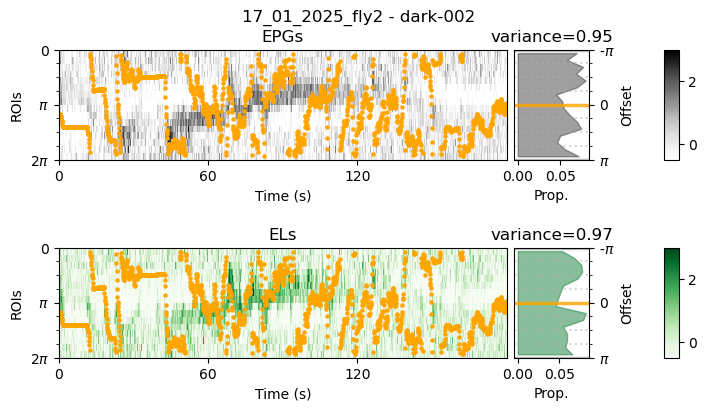

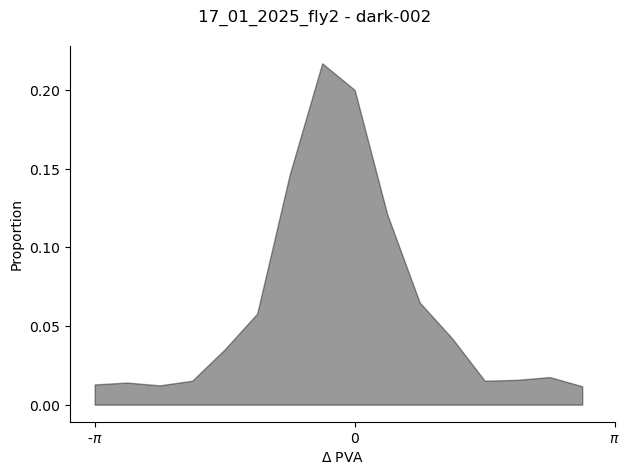

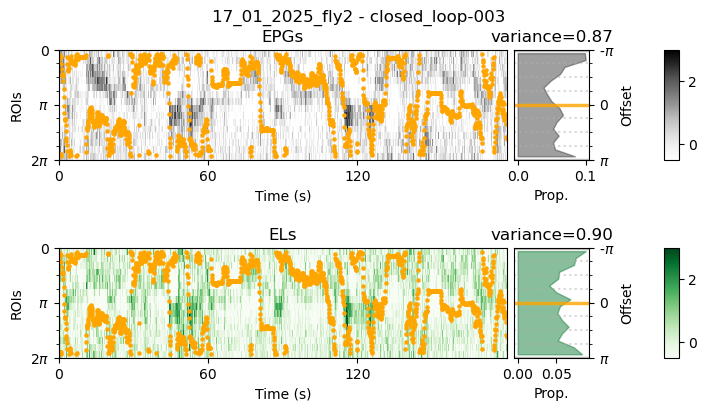

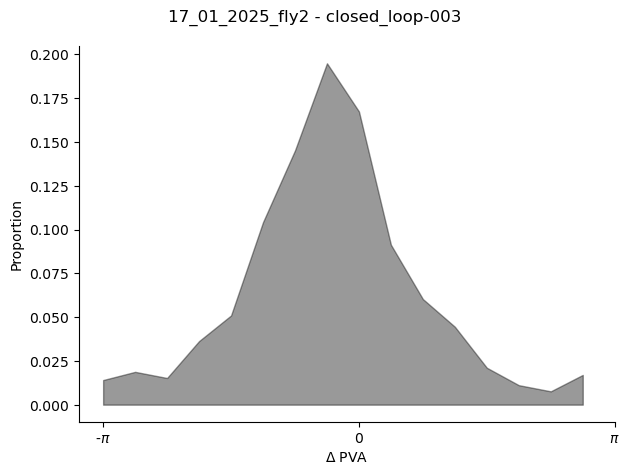

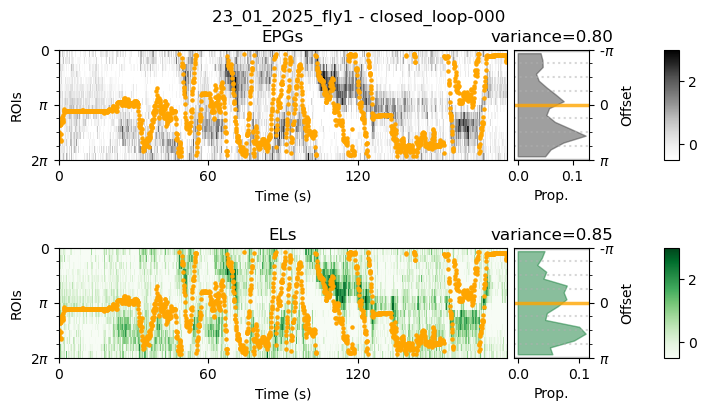

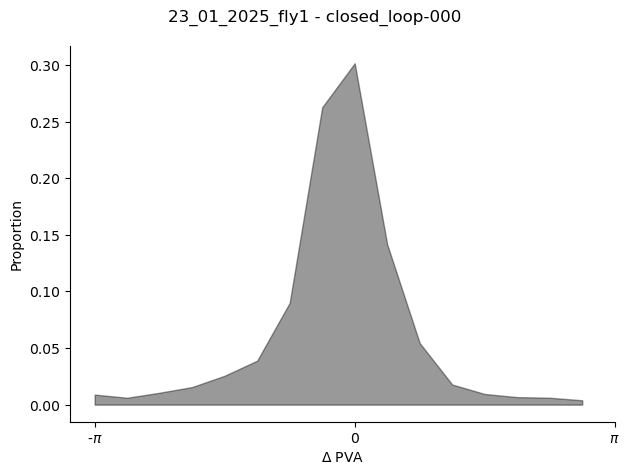

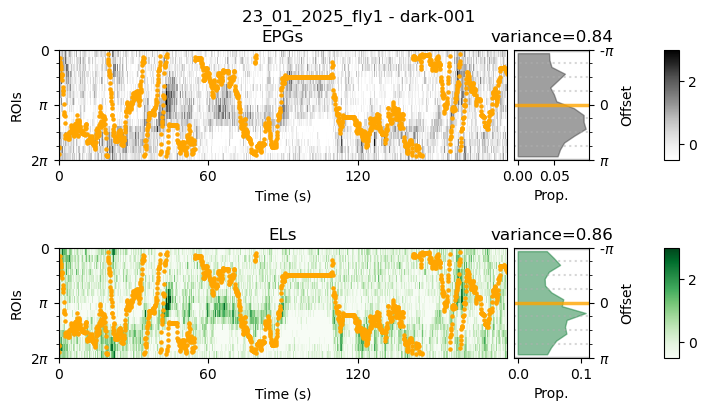

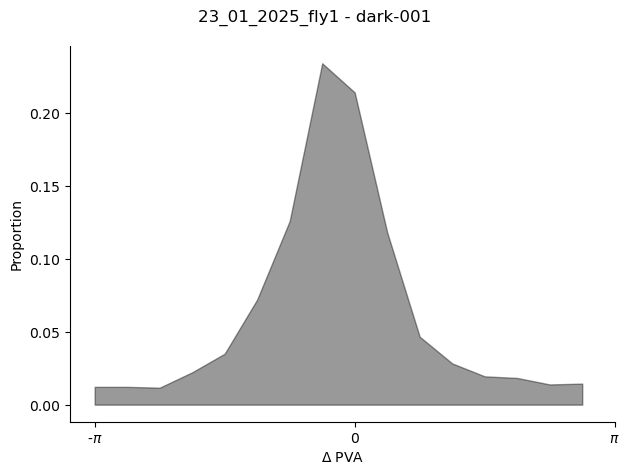

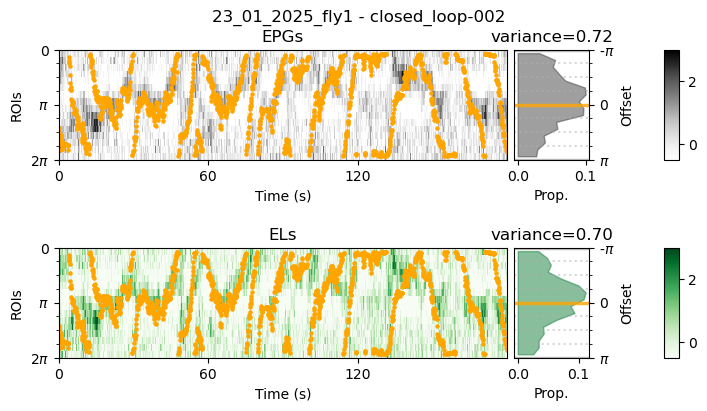

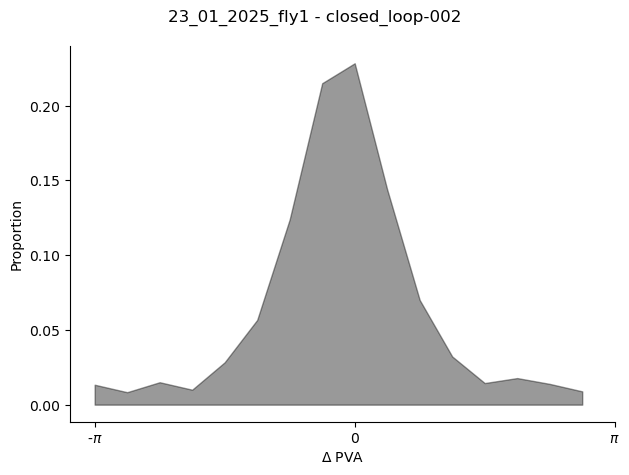

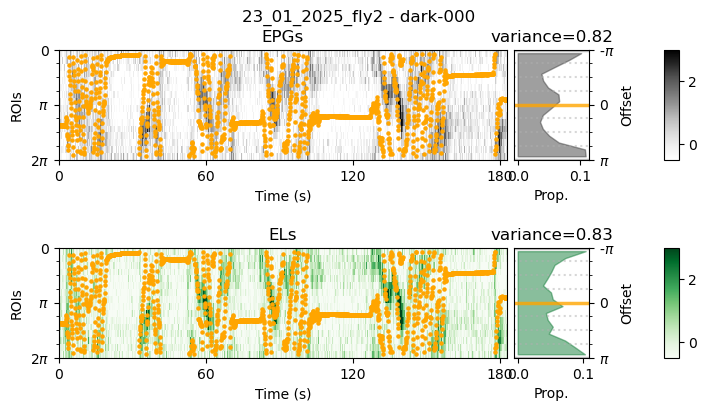

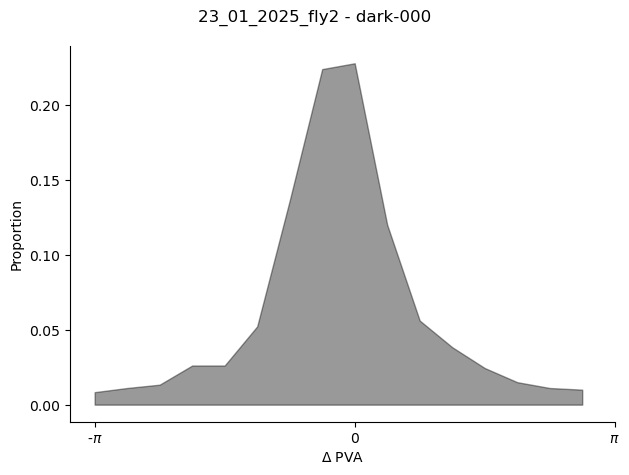

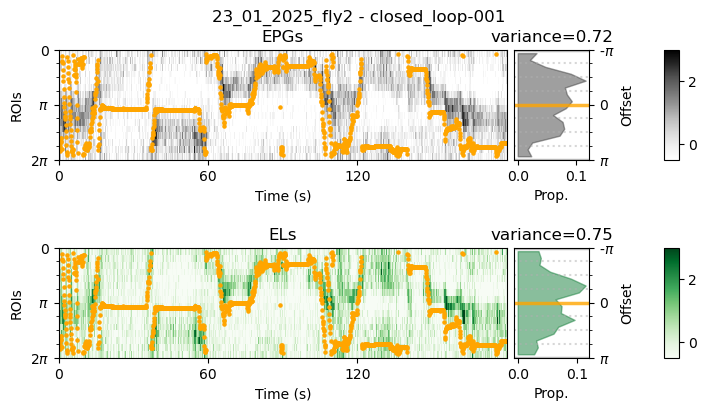

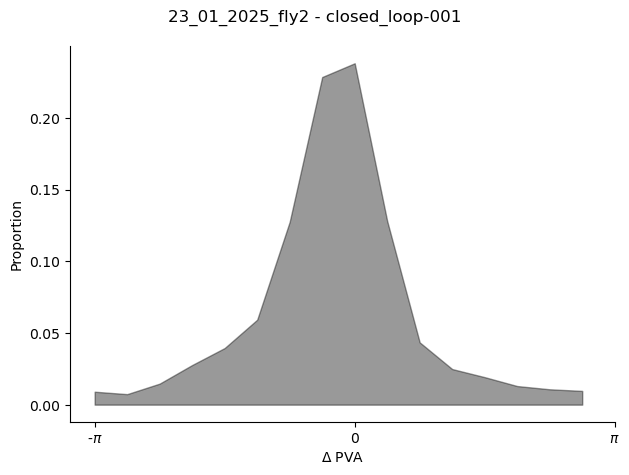

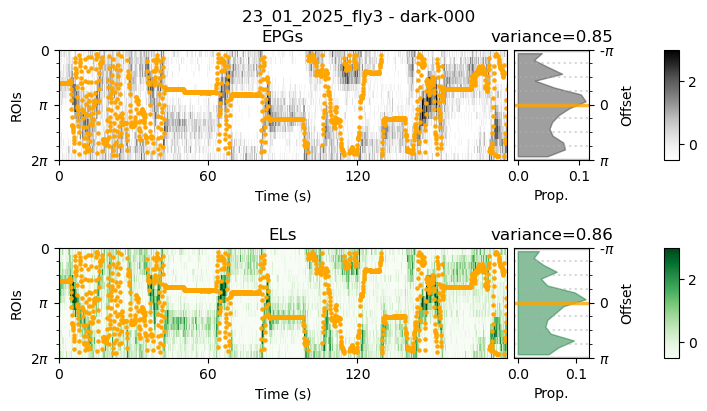

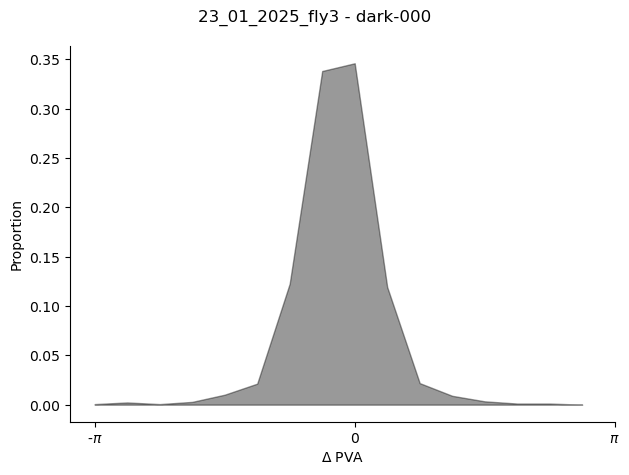

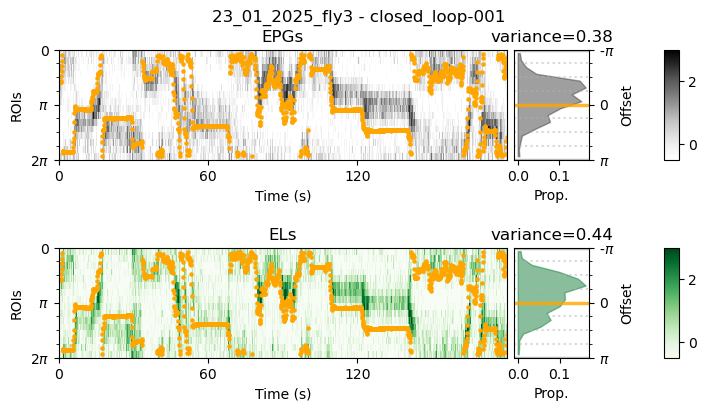

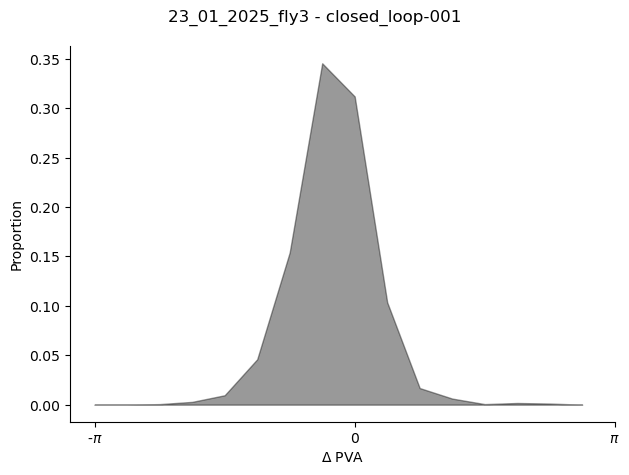

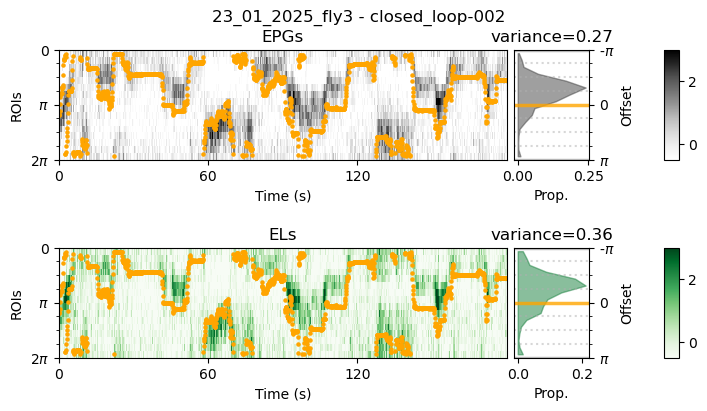

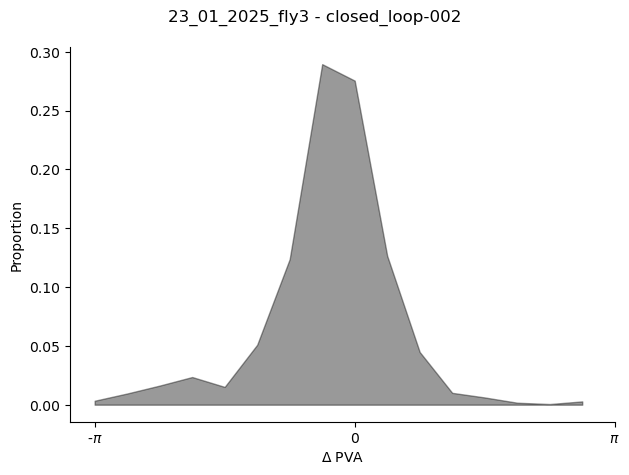

In [31]:
# all imaging sesions
session_folder = figfolder / "sessions"

# heatmaps
# histogram of differences in dark vs closed loop
for _, row in sess_df.iterrows():
    flyfolder = session_folder / f"{row['fly_id']}_{row['session']}"
    flyfolder.mkdir(exist_ok=True, parents=True)
    fig, ax = nmp.dual_imaging.plot_sess_heatmaps_w_hist(nmp.session.GetTS(load_row(row), channels=(0,1)), row['fly_id'], row['session'],
                                                  vmin=-.5, vmax=3)
    fig.savefig(flyfolder / "heatmaps.pdf", format='pdf', bbox_inches='tight')

    fig, ax = nmp.dual_imaging.plot_pva_diff_histograms(nmp.session.GetTS(load_row(row), channels=(0,1)), row['fly_id'], row['session'],)
    fig.savefig(flyfolder / "pva_diff.pdf", format='pdf', bbox_inches='tight')